In [1]:
# import libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# import dataset, train and test
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
# show an overview of dataset
train_data.head()

train_labels = train_data['label']
train_samples = train_data.drop(columns='label')

train_labels.head()
train_samples.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# count occurences of labels
print(train_labels.value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [5]:
def plot_image(image):
    plt.imshow(image)

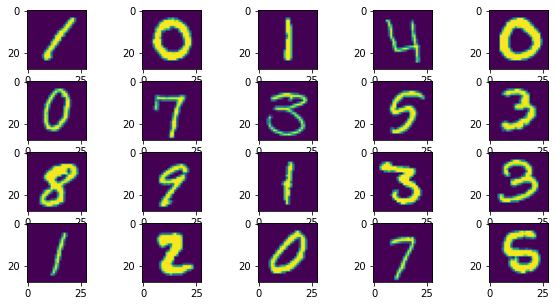

In [6]:
#plot first twenty images
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plot_image(np.array(train_samples.loc[i]).reshape(28, 28))
plt.show()

In [7]:
# split train data in sub train and test set, in order to train and evaluate locally the model

x_train, x_test, y_train, y_test = train_test_split(train_samples, train_labels, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [8]:
# create a simple neural network

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 1s 1ms/step - loss: 3.4522 - accuracy: 0.8101: 0s - loss: 3.7600 - accuracy: 
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5094 - accuracy: 0.8801
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3503 - accuracy: 0.9103
Epoch 4/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2984 - accuracy: 0.9202
Epoch 5/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2722 - accuracy: 0.9297
Epoch 6/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2593 - accuracy: 0.9305
Epoch 7/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2472 - accuracy: 0.9365
Epoch 8/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2153 - accuracy: 0.9430
Epoch 9/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2094 - accuracy: 0.9463
Epoch 10/20
1050/1050 [===========================

In [9]:
# create a simple neural network
x_train_f = x_train.values.reshape(-1,28,28,1)
print(x_train_f.shape)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

#print(model_1.summary())
history_2 = model_2.fit(x_train_f, y_train, epochs=20)

(33600, 28, 28, 1)
Epoch 1/20
1050/1050 [==============================] - 2s 1ms/step - loss: 4.5235 - accuracy: 0.8379
Epoch 2/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5788 - accuracy: 0.8791
Epoch 3/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4004 - accuracy: 0.9078
Epoch 4/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3359 - accuracy: 0.9185
Epoch 5/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2953 - accuracy: 0.9257
Epoch 6/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2476 - accuracy: 0.9372
Epoch 7/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2382 - accuracy: 0.9390
Epoch 8/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2203 - accuracy: 0.9422
Epoch 9/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2088 - accuracy: 0.9476
Epoch 10/20
1050/1050 [==============================] - 1s 1ms

Text(0.5, 1.0, 'Loss and Accuracy of Model 2')

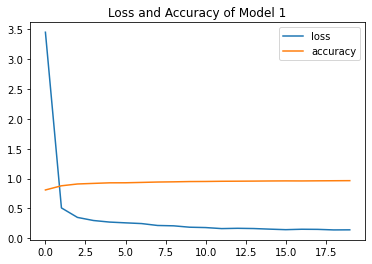

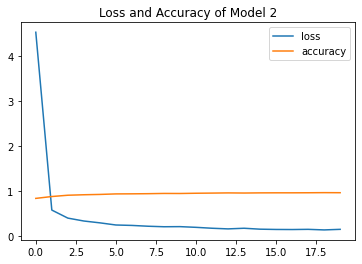

In [10]:
# plot accuracy of models
pd.DataFrame(history_1.history).plot()
plt.title("Loss and Accuracy of Model 1")

pd.DataFrame(history_2.history).plot()
plt.title("Loss and Accuracy of Model 2")

In [11]:
# compute the loss and other metrics of the model
loss_1,accuracy_1 = model_1.evaluate(x_test,y_test)

263/263 [==============================] - 0s 944us/step - loss: 0.3474 - accuracy: 0.9454


In [12]:
def convert_multi_dimensional_array_to_array(multi_array):
    single_array = []

    for elem in multi_array:    
        single_array.append(elem.argmax())
        
    return single_array

In [13]:
# Test the model on the test set, making a comparison between the y_test labels and the output of predict function
y_pred = model_1.predict(x_test)
yy_pred = convert_multi_dimensional_array_to_array(y_pred)

confusion_matrix(y_test, yy_pred)

array([[773,   0,   2,   0,   1,   0,   7,   0,  30,   0],
       [  0, 957,   4,   2,   1,   1,   2,   5,   7,   4],
       [  0,   3, 784,   4,   2,   0,   2,   8,  14,   3],
       [  0,   4,   9, 773,   1,   3,   1,  13,  14,   8],
       [  1,   1,   0,   0, 759,   0,  17,  11,   7,  18],
       [  1,   2,   4,  20,   1, 710,   7,   2,  11,   7],
       [  3,   2,   1,   0,   2,   4, 860,   1,  21,   0],
       [  1,   0,   6,   3,   3,   0,   1, 827,   3,  11],
       [  0,   7,   5,   7,   2,   6,   2,   5, 755,  10],
       [  4,   0,   0,   7,  18,   6,   0,  29,  24, 743]], dtype=int64)

In [14]:
y_final= model_1.predict(test_data)
#print(y_final)

In [15]:
y_final = np.array(convert_multi_dimensional_array_to_array(y_final))
print(y_final.shape)

(28000,)


In [16]:
result_file= open("result.txt","w+")
result_file.truncate()
result_file.write("ImageId,Label\n")
count = 1 
for elem in y_final:
    result_file.write(str(count) + ","+ str(elem) + "\n")
    count +=1
result_file.close()